In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline 
%matplotlib inline
import numpy as np
import modelbit
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import joblib


mb = modelbit.login()

In [6]:
df = pd.read_excel('D:\Moringa\Customer.xlsx')
df

,Original Amount,Sales (LCY),Profit (LCY)
0,14268.0,12300.00,4296.00
1,9701.0,8362.93,3779.93
2,6791.0,5854.31,2602.21
3,16491.0,14216.38,6299.48
4,8465.0,7297.42,3253.72
...,...,...,...
4811,5040.0,4344.83,759.03
4812,14663.0,12640.52,5836.32
4813,26573.0,22907.76,13641.18
4814,16733.0,14425.00,8600.31


In [7]:
df.shape

(4816, 3)

In [8]:
df.head(10)

,Original Amount,Sales (LCY),Profit (LCY)
0,14268.0,12300.00,4296.00
1,9701.0,8362.93,3779.93
2,6791.0,5854.31,2602.21
3,16491.0,14216.38,6299.48
4,8465.0,7297.42,3253.72
5,12065.0,10400.86,6044.60
6,92151.0,79440.52,36054.02
7,308.0,265.52,157.72
8,38751.0,33406.03,13141.03
9,43401.0,37414.66,14400.26


In [9]:
df.tail(10)

,Original Amount,Sales (LCY),Profit (LCY)
4806,7100.0,6120.69,2799.89
4807,12536.0,10806.90,4521.50
4808,161019.0,138809.48,64583.38
4809,15091.0,13009.49,6335.59
4810,32402.0,27932.76,16716.96
4811,5040.0,4344.83,759.03
4812,14663.0,12640.52,5836.32
4813,26573.0,22907.76,13641.18
4814,16733.0,14425.00,8600.31
4815,12050.0,10387.93,6320.33


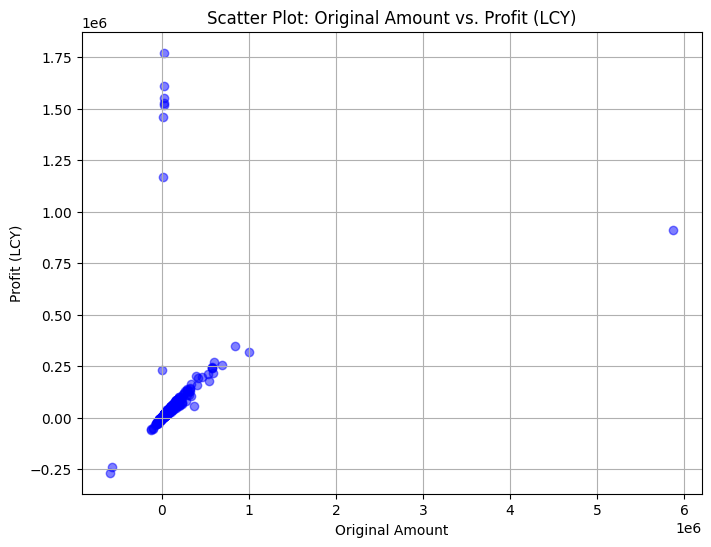

In [10]:

x = df['Original Amount']
y = df['Profit (LCY)']

# Create scatter plot
plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.scatter(x, y, color='blue', alpha=0.5)  # Adjust color and transparency as needed

# Add labels and title
plt.xlabel('Original Amount')
plt.ylabel('Profit (LCY)')
plt.title('Scatter Plot: Original Amount vs. Profit (LCY)')

# Show plot
plt.grid(True)  # Add grid
plt.show()

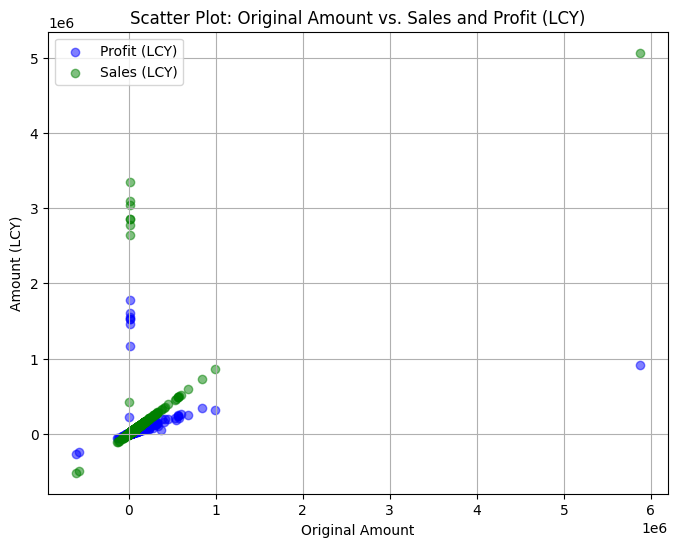

In [11]:

x = df['Original Amount']
y = df['Profit (LCY)']
sales = df['Sales (LCY)']

# Create scatter plot
plt.figure(figsize=(8, 6))  # Adjust size if needed

# Scatter plot for 'Original Amount' vs 'Profit (LCY)'
plt.scatter(x, y, color='blue', alpha=0.5, label='Profit (LCY)')

# Scatter plot for 'Original Amount' vs 'Sales (LCY)'
plt.scatter(x, sales, color='green', alpha=0.5, label='Sales (LCY)')

# Add labels and title
plt.xlabel('Original Amount')
plt.ylabel('Amount (LCY)')
plt.title('Scatter Plot: Original Amount vs. Sales and Profit (LCY)')

# Add legend
plt.legend()

# Show plot
plt.grid(True)  # Add grid
plt.show()

In [12]:
print(df.describe())

       Original Amount   Sales (LCY)  Profit (LCY)
count     4.816000e+03  4.816000e+03  4.816000e+03
mean      2.741116e+04  2.798918e+04  1.405403e+04
std       9.764582e+04  1.398988e+05  6.272058e+04
min      -6.000000e+05 -5.172414e+05 -2.679250e+05
25%       3.116000e+03  2.688145e+03  1.219852e+03
50%       1.500100e+04  1.293750e+04  6.511880e+03
75%       3.303425e+04  2.860970e+04  1.537506e+04
max       5.874240e+06  5.064000e+06  1.771668e+06


In [13]:
numerical_cols = ['Original Amount', 'Sales (LCY)', 'Profit (LCY)']
data_numeric = df[numerical_cols]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

In [14]:


# Drop rows with missing values
df_cleaned = df.dropna()

# Select relevant numerical columns for clustering
numerical_cols = ['Original Amount', 'Sales (LCY)', 'Profit (LCY)']
df_numeric = df_cleaned[numerical_cols]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because the range starts from 2

# Apply K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df_cleaned['Cluster'] = kmeans.labels_

# Print the DataFrame with cluster labels
print(df_cleaned)


      Original Amount  Sales (LCY)  Profit (LCY)  Cluster
0             14268.0     12300.00       4296.00        0
1              9701.0      8362.93       3779.93        0
2              6791.0      5854.31       2602.21        0
3             16491.0     14216.38       6299.48        0
4              8465.0      7297.42       3253.72        0
...               ...          ...           ...      ...
4811           5040.0      4344.83        759.03        0
4812          14663.0     12640.52       5836.32        0
4813          26573.0     22907.76      13641.18        0
4814          16733.0     14425.00       8600.31        0
4815          12050.0     10387.93       6320.33        0

[4816 rows x 4 columns]


In [15]:
# Check unique cluster labels and their counts
unique_clusters = df_cleaned['Cluster'].value_counts()

# Print the unique clusters and their counts
print("Unique clusters:")
print(unique_clusters)


Unique clusters:
Cluster
0    4808
1       8
Name: count, dtype: int64


In [16]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_score = silhouette_score(scaled_data, kmeans.labels_)

# Print silhouette score
print("Silhouette Score:", silhouette_score)


Silhouette Score: 0.9854329122201185


In [17]:
# Filter the DataFrame for rows with cluster label 1
rows_cluster_1 = df_cleaned[df_cleaned['Cluster'] == 1]

# Print the rows with cluster label 1
print("Rows with cluster label 1:")
print(rows_cluster_1)


Rows with cluster label 1:
      Original Amount  Sales (LCY)  Profit (LCY)  Cluster
1150         16824.90   2648091.20    1166505.25        1
1685         17622.66   2773651.60    1461327.06        1
1711       5874240.00   5064000.00     909200.00        1
1874         18150.35   2856705.37    1527697.67        1
2875         21230.55   3341501.74    1771668.04        1
4190         19352.75   3045952.55    1519601.30        1
4256         18150.64   2856751.01    1549605.31        1
4411         19635.22   3090410.84    1611894.34        1


In [18]:
# Filter the DataFrame for rows with cluster label 1
rows_cluster_1 = df_cleaned[df_cleaned['Cluster'] == 0]

# Print the rows with cluster label 1
print("Rows with cluster label 1:")
print(rows_cluster_1)


Rows with cluster label 1:
      Original Amount  Sales (LCY)  Profit (LCY)  Cluster
0             14268.0     12300.00       4296.00        0
1              9701.0      8362.93       3779.93        0
2              6791.0      5854.31       2602.21        0
3             16491.0     14216.38       6299.48        0
4              8465.0      7297.42       3253.72        0
...               ...          ...           ...      ...
4811           5040.0      4344.83        759.03        0
4812          14663.0     12640.52       5836.32        0
4813          26573.0     22907.76      13641.18        0
4814          16733.0     14425.00       8600.31        0
4815          12050.0     10387.93       6320.33        0

[4808 rows x 4 columns]


In [19]:


# Save the trained scaler and k-Means model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

# Later, load the saved scaler and k-Means model
loaded_scaler = joblib.load('scaler.pkl')
loaded_kmeans = joblib.load('kmeans_model.pkl')

In [20]:
# Input data provided as individual values
import numpy as np
input_data = np.array([[19635.22,3090410.84,1611894.34]])  # Organize the values into a 2D array

# Load the saved scaler and k-Means model
loaded_scaler = joblib.load('scaler.pkl')
loaded_kmeans = joblib.load('kmeans_model.pkl')

# Scale the input data using the loaded scaler
scaled_input_data = loaded_scaler.transform(input_data)

# Predict clusters using the loaded k-Means model
predicted_cluster = loaded_kmeans.predict(scaled_input_data)

# Print the predicted cluster
print("Predicted Cluster:", predicted_cluster[0])

Predicted Cluster: 1


d:\Moringa\moringa_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
# Define the function to predict loan default probability based on clustering
def predict_cluster(Sales: float, Profit: float, Original_Amount: float) -> int:
    """
    Predict the cluster for new data using a pre-trained clustering model.

    Args:
        Sales (float): Sales amount.
        Profit (float): Profit amount.
        Original_Amount (float): Original amount.

    Returns:
        int: Predicted cluster label.
    """

    # Organize the input values into a 2D array
    input_data = np.array([[Original_Amount, Sales, Profit]])

    # Scale the input data using the loaded scaler
    scaled_input_data = loaded_scaler.transform(input_data)

    # Predict clusters using the loaded k-Means model
    predicted_cluster = loaded_kmeans.predict(scaled_input_data)

        # Return the predicted cluster label
    return predicted_cluster[0]

# Example usage of the function inal 
Sales = 2648091.20
Profit = 1166505.25
Original_Amount = 16824.90

predicted_cluster = predict_cluster(Sales, Profit, Original_Amount)
print("Predicted Cluster Label:", predicted_cluster)


Predicted Cluster Label: 1


d:\Moringa\moringa_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
mb.deploy(predict_cluster)

In [23]:
import requests
import json

url = "https://veranziverah.app.modelbit.com/v1/predict_cluster/latest"
headers = {
    'Content-Type': 'application/json'
}
data = {
    "data": [3341501.74,1771668.04,21230.55]
}

response = requests.post(url, headers=headers, json=data)
response_json = response.json()

print(json.dumps(response_json, indent=4))

{
    "data": 1
}


In [ ]:
# Deploy the trained model
#model = mb.deploy(model_name='recommender_system', model_object=trained_model)